# Testeo de hipótesis

- Estadistica Inferencial
- Población Vs Muestra
- Testeo de Hipótesis 
    - P-value 
    - Tipos de pruebas estadísticas: paramétricas no paramétricas


In [1]:
#Importaciones
#Tratamineto de datos
import pandas as pd
import numpy as np
#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
#Pruebas estadísticas
import scipy.stats as stats

In [2]:
#Leer el archivo CSV (simimar a "datos_ventas_mes.csv pero ampliado")
df = pd.read_csv('data/datos_seguros_medicos.csv')

In [3]:
df.head()

,fecha,producto,precio,cantidad,region,id_vendedor
0,2024-08-10 16:58:11.991336,Producto C,65.655240,17,Oeste,64
1,2023-12-08 16:58:11.991383,Producto C,49.342497,3,Oeste,61
2,2024-02-24 16:58:11.991391,Producto A,44.448005,18,Norte,54
3,2024-08-06 16:58:11.991395,Producto B,68.811571,8,Este,92
4,2024-09-10 16:58:11.991399,Producto B,35.519861,19,Sur,94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        1000 non-null   object 
 1   producto     1000 non-null   object 
 2   precio       1000 non-null   float64
 3   cantidad     1000 non-null   int64  
 4   region       1000 non-null   object 
 5   id_vendedor  1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,1000.0,50.552898,9.994023,20.786495,43.847361,50.392976,57.118272,81.931076
cantidad,1000.0,10.178000,5.559607,1.000000,5.000000,10.000000,15.000000,19.000000
id_vendedor,1000.0,49.597000,28.529748,1.000000,25.000000,48.000000,74.250000,100.000000


### Formulación de hipótesis (algo que planteo)
- Formulación Hiótesis, ej: Nos dicen que el precio medio de nuestros productos es 55.
- Hipótesis Nula (H0): La hip. inicial, de la que partimos (pr medio 55).
- Hipótesis Alternativa (H1): El precio medio de los prod. no es 55 (es menor o mayor que 55).
- Nivel de significancia, cuanta prob máx acepto al rechazar una hipótesis siendo verdadera.
- Elegir mi prueba estadística: t-student


In [6]:
#Intervalos de confianza. IC
precio = df['precio']

#Calcular la media de la muestra
media_precio = np.mean(precio)

#Desviación estándar de la muestra
desviacion_precio = np.std(precio, ddof=1)  # ddof=1 grados de libertad, elegimos 1 porque queremos la desviación muestral

#Tamaño de la muestra
n_precio = len(precio)

#Nivel de confianza-- 95% α= 0.05
alpha = 0.05
#Grados de libertad para la distribución de la t-student
n_precio_t = n_precio - 1

#Valor crítico t para un nivel de confianza del 95%
t_critico = stats.t.ppf(1 - alpha / 2, n_precio_t)

#Error estándar de la media
error_estandar = desviacion_precio / np.sqrt(n_precio)

#Intervalo de confianza
ic_inferior = media_precio - t_critico * error_estandar
ic_superior = media_precio + t_critico * error_estandar
print(f"Intervalo de confianza del 95% para la media del precio:\n IC inferior: {ic_inferior}\n IC superior: {ic_superior}")

Intervalo de confianza del 95% para la media del precio:
 IC inferior: 49.932722010034496
 IC superior: 51.17307396755817


In [ ]:
#Formulación de hipótesis (algo que planteo)
#- Formulación Hiótesis, ej: Nos dicen que el precio medio de nuestros productos es 55.
#- Hipótesis Nula (H0): La hip. inicial, de la que partimos (pr medio 55).
#- Hipótesis Alternativa (H1): El precio medio de los prod. no es 55 (es menor o mayor que 55).
#- Nivel de significancia, cuanta prob máx acepto al rechazar una hipótesis siendo verdadera.
nivel_significancia = 0.05
#- Elegir mi prueba estadística: t-student
t_stat, p_value = stats.ttest_1samp(df["precio"], 55)
print(t_stat)
print(p_value)

if p_value < nivel_significancia:
    print("Rechazamos la hipótesis nula, el precio promedio es diferente de 55")
else:
    print("No tenemos evidencia suficiene para decir que la media del precio sea distinta de 55")

* ### Prueba de Hipotesis, P_Value, T-student

In [7]:
#Formulación de hipótesis sobre la columna cantidad
#- Formulación Hiótesis nula y la alternativa para la prueba de T-student
#- Hipótesis Nula (H0): la mediana de la cantidad es 10.
#- Hipótesis Alternativa (H1): la mediana de la cantidad no es 10.
#- Realizar la prueba de Wilcoxon para la variable 'cantidad'
t_stat, p_value_cantidad = stats.ttest_1samp(df["cantidad"], 10)
#- Imprimir resultados de la prueba de Wilcoxon
print("\nRest de hipótesis para 'cantidad' (Prueba de T-student):")
print(f"Estadístico t: {t_stat}")
print(f"p-valor: {p_value_cantidad}")
      
#- Interpretación de los resultados
if p_value_cantidad < 0.05:
    print("Rechazamos la hipótesis nula, la media de la cantidad no es 10.")
else:
    print("No rechazamos la hipótesis nula, no hay evidencia suficiente para afirmar que la media de la cantidad es diferente de 10.")

-14.07138128099968
3.671532210465493e-41
Rechazamos la hipótesis nula, el precio promedio es diferente de 55


* ### Comprobación de normalidad, dos formas

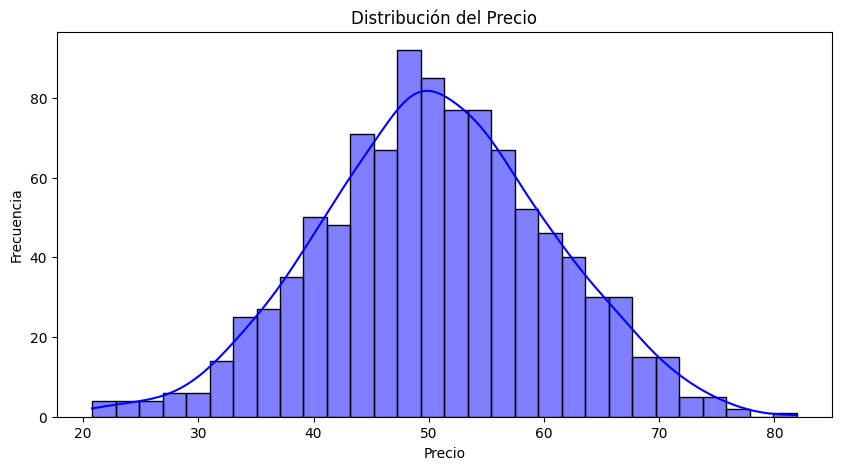

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df["precio"], 
             kde=True, 
             color='blue', 
             bins=30)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia');

* ### Precio

In [9]:
# Acercamiento con una prueba estadística de normalidad
# Planteamiento de hipótesis:
# H0 = La muestra sigue una distribución normal
# H1 = La muestra no sigue una distribución normal
nivel_significancia = 0.05
stat, p_value = stats.shapiro(df["precio"])
print(f"Prueba de normalidad para la columna 'precio':")
print(f"Estadístico de Shapiro-Wilk: {stat}\n p-valor: {p_value}")

if p_value > nivel_significancia:
    print("Los datos de 'precio' son normales")
else:
    print("\nLos datos de 'precio' no son normales")

Prueba de normalidad para la columna 'precio':
Estadístico de Shapiro-Wilk: 0.9986805306124569
 p-valor: 0.6754264715513754
Los datos de 'precio' son normales


* ### Cantidad

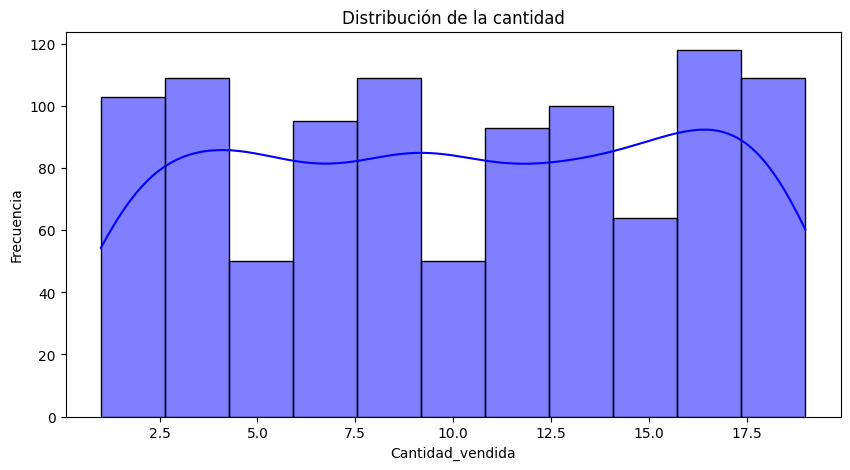

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df["cantidad"], 
             kde=True, 
             color='blue')
plt.title('Distribución de la cantidad')
plt.xlabel('Cantidad_vendida')
plt.ylabel('Frecuencia');

In [12]:
# Acercamiento con una prueba estadística de normalidad
# Planteamiento de hipótesis:
# H0 = La muestra sigue una distribución normal
# H1 = La muestra no sigue una distribución normal
nivel_significancia = 0.05
stat, p_value_cantidad = stats.shapiro(df["cantidad"])
print(f"\nPrueba de normalidad para la columna 'cantidad':")
print(f"Estadístico de Shapiro-Wilk: {stat}, \np-valor: {p_value_cantidad}")

if p_value_cantidad > nivel_significancia:
    print("Los datos de 'cantidad' son normales")
else:
    print("\nLos datos de 'cantidad' no son normales")


Prueba de normalidad para la columna 'cantidad':
Estadístico de Shapiro-Wilk: 0.9439132302588524, 
p-valor: 5.196272804060197e-19

Los datos de 'cantidad' no son normales


In [16]:
# Al no ser normales los datos, tenemos que elegir una prueba estadística distinta a la T-student
#Definir la hipótesis nula y alternativa para la prueba de Wilcoxon
#- Hipótesis Nula (H0): La mediana de la cantidad es 10.
#- Hipótesis Alternativa (H1): La mediana de la cantidad no es 10.

nivel_significancia = 0.05
stat_wilcoxon, p_valor_wilcoxon = stats.wilcoxon(df["cantidad"] - 10)
# Imprimir resultados de la prueba de Wilcoxon
print(f"\nTest de hipótesis para 'cantidad' (Prueba de Wilcoxon):")
print(f"Estadístico de Wilcoxon: {stat_wilcoxon}")
print(f"p-valor: {p_value_cantidad}")

# Interpretación de los resultados
if p_value_cantidad < 0.05:
    print("Rechazamos la hipótesis nula: La mediana de la cantidad no es igual a 10.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que la mediana es 10.")


Test de hipótesis para 'cantidad' (Prueba de Wilcoxon):
Estadístico de Wilcoxon: 217060.0
p-valor: 5.196272804060197e-19
Rechazamos la hipótesis nula: La mediana de la cantidad no es igual a 10.
